In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from string import ascii_letters

In [2]:
comp_df = pd.read_csv('WorkingDataFrame', index_col=0)
comp_df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,690.0,62.0,117.0,139.0,0,1,1,3.864345,9.0,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,1120.0,71.0,242.0,237.0,1,0,0,12.028832,9.0,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,325.0,61.0,33.0,60.0,1,0,0,3.369134,13.0,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,509.0,80.0,59.0,110.0,1,1,0,3.299697,15.0,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,720.0,67.0,149.0,167.0,0,1,1,3.726269,20.0,5.000000


In [3]:
#Calculate correlation with .corr(): 
print(comp_df.corr(method = 'spearman'))

           P(IPO)      P(H)      P(L)   P(1Day)        C1        C2        C3  \
P(IPO)   1.000000  0.803705  0.805593  0.647840 -0.068953  0.268853  0.175611   
P(H)     0.803705  1.000000  0.996178  0.444217 -0.065231  0.280728  0.141659   
P(L)     0.805593  0.996178  1.000000  0.447109 -0.062057  0.291564  0.145824   
P(1Day)  0.647840  0.444217  0.447109  1.000000 -0.035852  0.234564  0.045517   
C1      -0.068953 -0.065231 -0.062057 -0.035852  1.000000 -0.000488  0.046093   
C2       0.268853  0.280728  0.291564  0.234564 -0.000488  1.000000  0.015888   
C3       0.175611  0.141659  0.145824  0.045517  0.046093  0.015888  1.000000   
C4      -0.004493 -0.041148 -0.045253  0.002386  0.091500 -0.031415  0.014531   
C5       0.358363  0.375942  0.380110  0.216681  0.050327  0.432822  0.133456   
C6       0.396868  0.448986  0.455252  0.194187  0.002105  0.401304  0.167353   
C7       0.407719  0.496943  0.499369  0.159160  0.069115  0.210420  0.341290   
T1       0.274026  0.295533 

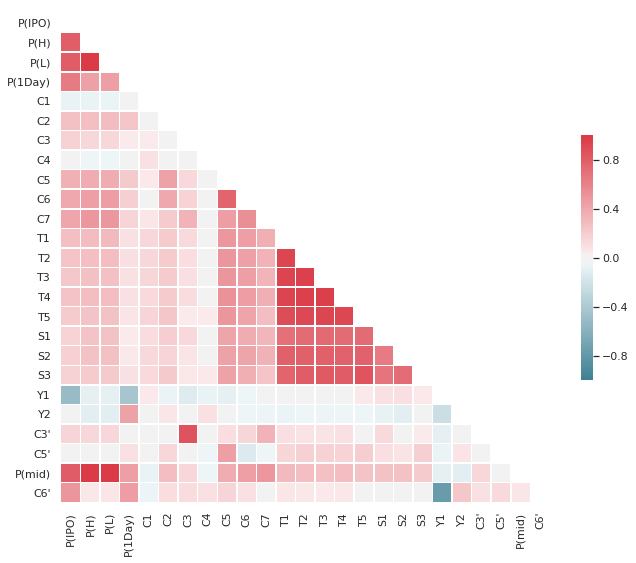

In [4]:

# Compute the correlation matrix
corr = comp_df.corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [5]:
#Sort out the top correlation values using Spearman method 
def correl(comp_df):
    cor = comp_df.corr(method = 'spearman')
    corrm = np.corrcoef(comp_df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    
   ##Print max and min correlation values 
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    
    ## Drop duplicates, sort values in decending order, and include all values not equal to 1
    cor1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = cor1[cor1.values!=1]
    
    
    ## Display threshold above 0.5 for highly correlated results        
    threshold = 0.5
    display(high_cor[high_cor>threshold])
correl(corr)

max corr: 0.9999855621959038 , min corr:  -0.9738444920656848


T4       T3        0.999231
T3       T2        0.997692
T2       T4        0.996923
P(H)     P(L)      0.995385
T1       T4        0.993846
T3       T1        0.993077
T1       T2        0.990769
S3       T5        0.983077
T5       T3        0.980000
T4       T5        0.979231
T5       T2        0.977692
T1       T5        0.970769
T5       S2        0.968462
T3       S3        0.967692
T4       S3        0.966923
T2       S3        0.965385
         S2        0.962308
T1       S2        0.960769
T3       S1        0.960000
S1       T4        0.959231
T4       S2        0.957692
S1       T2        0.956154
         T1        0.955385
T1       S3        0.954615
S1       T5        0.952308
S3       S2        0.944615
S1       S2        0.939231
S3       S1        0.936923
P(IPO)   P(L)      0.898462
         P(mid)    0.896154
                     ...   
S3       C6        0.633846
T5       Y1        0.621538
S3       Y1        0.618462
C7       C2        0.610000
C2       C5        0

In [6]:
#Sort out the low correlation values using Spearman method 
def correl(comp_df):
    cor = comp_df.corr(method = 'spearman')
    corrm = np.corrcoef(comp_df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    
    ##Print max and min correlation values 
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    
    ## Drop duplicates, sort values in decending order, and include all values not equal to -1
    cor1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    low_cor = cor1[cor1.values!=-1]
    
    ## Display threshold below -0.5 for highly correlated results      
    threshold = -0.5
    display(low_cor[low_cor<threshold])
correl(corr)


max corr: 0.9999855621959038 , min corr:  -0.9738444920656848


S1       C6'   -0.502308
T2       Y2    -0.515385
Y2       T4    -0.518462
T3       Y2    -0.520000
Y2       C7    -0.522308
P(IPO)   C1    -0.536923
Y2       T1    -0.538462
S2       C6'   -0.555385
Y2       T5    -0.566154
         S1    -0.592308
Y1       Y2    -0.609231
C6'      C1    -0.623077
P(1Day)  Y1    -0.649231
Y2       S2    -0.652308
P(1Day)  C1    -0.693077
C6'      Y1    -0.891538
dtype: float64

In [7]:
#### check if features are highly correlated with T4 (>.5)
comp_df.corr()['T4'] > 0.5 


P(IPO)     False
P(H)       False
P(L)       False
P(1Day)    False
C1         False
C2         False
C3         False
C4         False
C5         False
C6         False
C7         False
T1          True
T2          True
T3          True
T4          True
T5          True
S1          True
S2          True
S3          True
Y1         False
Y2         False
C3'        False
C5'        False
P(mid)     False
C6'        False
Name: T4, dtype: bool

In [8]:
#### check if features are highly correlated with Y1 (< -.5)
comp_df.corr()['Y1'] < -0.5 

P(IPO)     False
P(H)       False
P(L)       False
P(1Day)    False
C1         False
C2         False
C3         False
C4         False
C5         False
C6         False
C7         False
T1         False
T2         False
T3         False
T4         False
T5         False
S1         False
S2         False
S3         False
Y1         False
Y2         False
C3'        False
C5'        False
P(mid)     False
C6'         True
Name: Y1, dtype: bool